<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/vibration/assignments/Assignment_on_Modal_Analysis_of_Finite_Dimensional_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Systems - Introduction to Vibratory Systems - Assignment #3: Introduction to Modes of Vibrations in Finite Dimensional Systems

* This is Assignment#1 on Dynamic Systems. It is intended to give you some experience on representing motion in moving (non Inertial) frames.

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to 
'E90512_Assignment#1_DynamicSystems.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk

# Setting Up Python

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

#Q#1 Torsional Double Pendulum

Consider the 2-DOF torsionally coupled pendulum in the applied mechanics lab that is shown in the figure below. Answer the following with detailed justification.
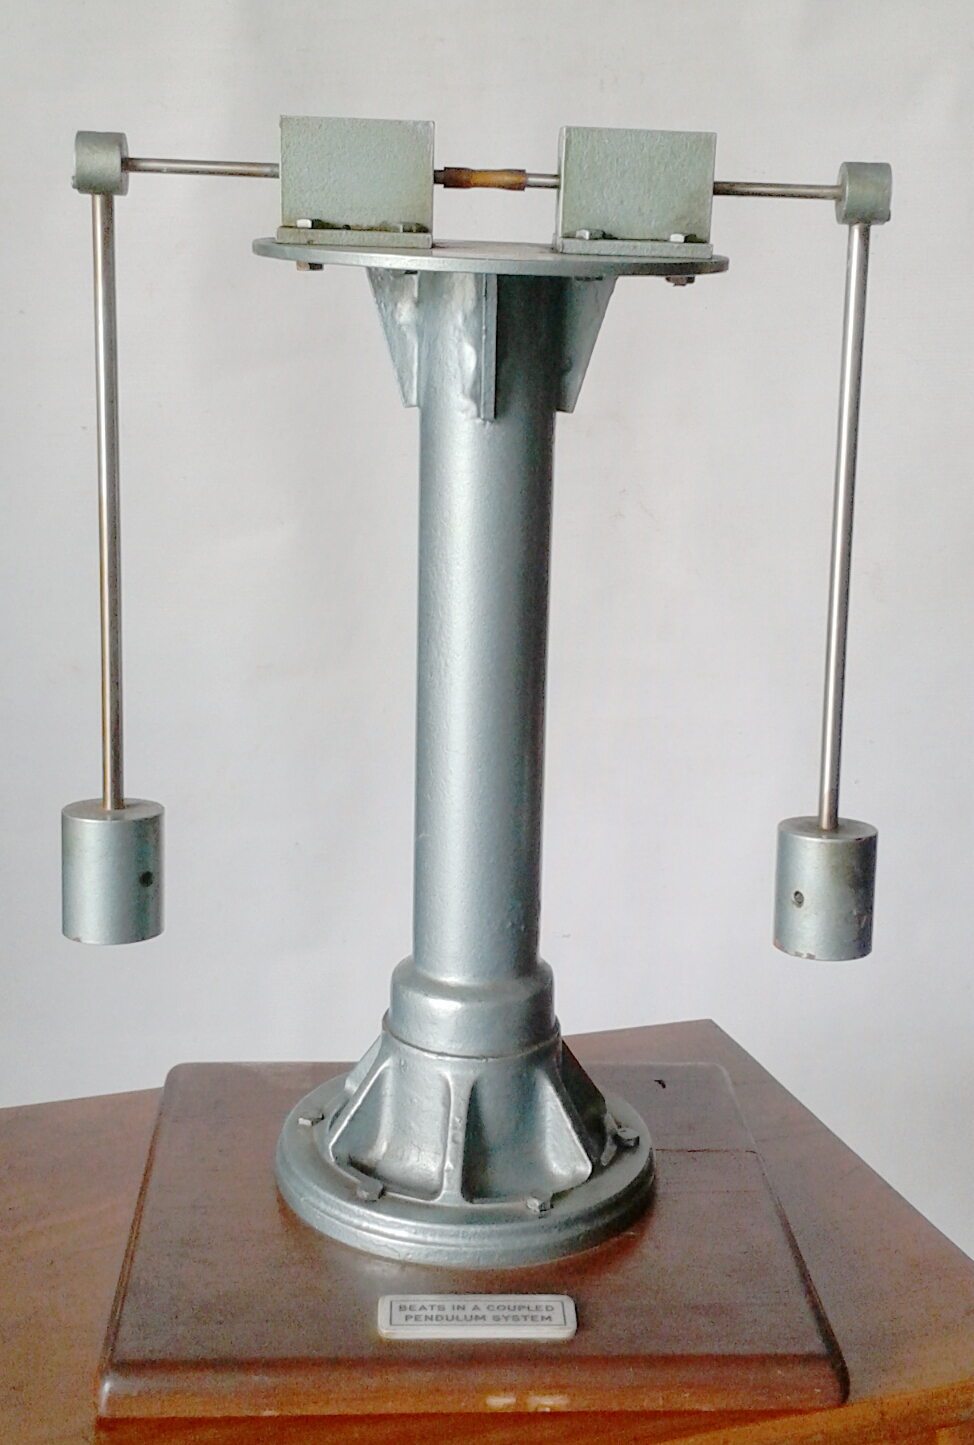

##Q#1.1

Assuming that the pendulums can be modelled as heavy masses at the end of massless rods and neglecting damping show that the system cane be represented as
\begin{align}
\ddot{\theta}+\Omega\theta=0,
\end{align}
where 
\begin{align}
\theta=\begin{bmatrix}\theta_1 \\ \theta_2\end{bmatrix},\:\:\:\:\:\:
\Omega=\begin{bmatrix}\omega_n^2+\omega_0^2 & -\omega_n^2\\ -\omega_n^2 & \omega_n^2+\omega_0^2\end{bmatrix},
\end{align}
and $\omega_0^2=\frac{g}{l}$, $\omega_n^2=\frac{k}{ml^2}$ where $k$ is the torsional spring constant of the flexible coupling, $l$ is the length of the rod, and $m$ is the mass of the pendulum.


##Q#1.2

Show that  
\begin{align}
\omega_1^2=\omega_n^2,\:\:\:\:\:\omega_2^2={2\omega_n^2+\omega_0^2}
\end{align}
are the eigenvalues of $\Omega$ and 
\begin{align}
\bar{\theta}_1=\begin{bmatrix}1 \\1\end{bmatrix},\:\:\:\:\:\bar{\theta}_2=\begin{bmatrix}1 \\-1\end{bmatrix}
\end{align}
are the corresponding eigenvectors of $\Omega$.

##Q#1.3


Let $T\triangleq [\bar{\theta}_1\:\:\:\bar{\theta}_2]$. Show that
\begin{align*}
\Omega T&=TD
\end{align*}
where $D=\mathrm{diag}\{\omega_1^2,\omega_2^2\}$.


##Q#1.4

Let $\Theta=[\Theta_1\:\:\:\Theta_2]^T$ be a new coordinate system defined by $\theta \triangleq T\Theta$. Show that the system equations $\ddot{\theta}+\Omega \theta=0$ when expressed in the new coordinates $\Theta$ take the diagonal form
\begin{align}
\ddot{\Theta}+D\Theta&=0,
\end{align}
which written down explicitly is
\begin{align}
\ddot{\Theta}_1+\omega_1^2\Theta_1&=0,\\
\ddot{\Theta}_2+\omega_2^2\Theta_2&=0.
\end{align}


##Q#1.5

Show that a general solution of the system can be written down as a linear combination of the modes and using these results explain the behavior  shown in the following video: https://youtu.be/RoSYKPTdlxs, https://youtu.be/YyOUJUOUvso



#Q#2 Coupled Rotor System

A uniform shaft of 9.52 mm diameter is supported in ball bearings and carries four discs A, B, C, D. The bearings are placed close to the discs, so that the sag of the shaft is reduced to a minimum. The wheel A carries a small spindle which is supported in ball bearings. The spindle carries an out-of balance mass and is belt driven by a variable speed DC motor.  A schematic of the setup is shown in the figure below.
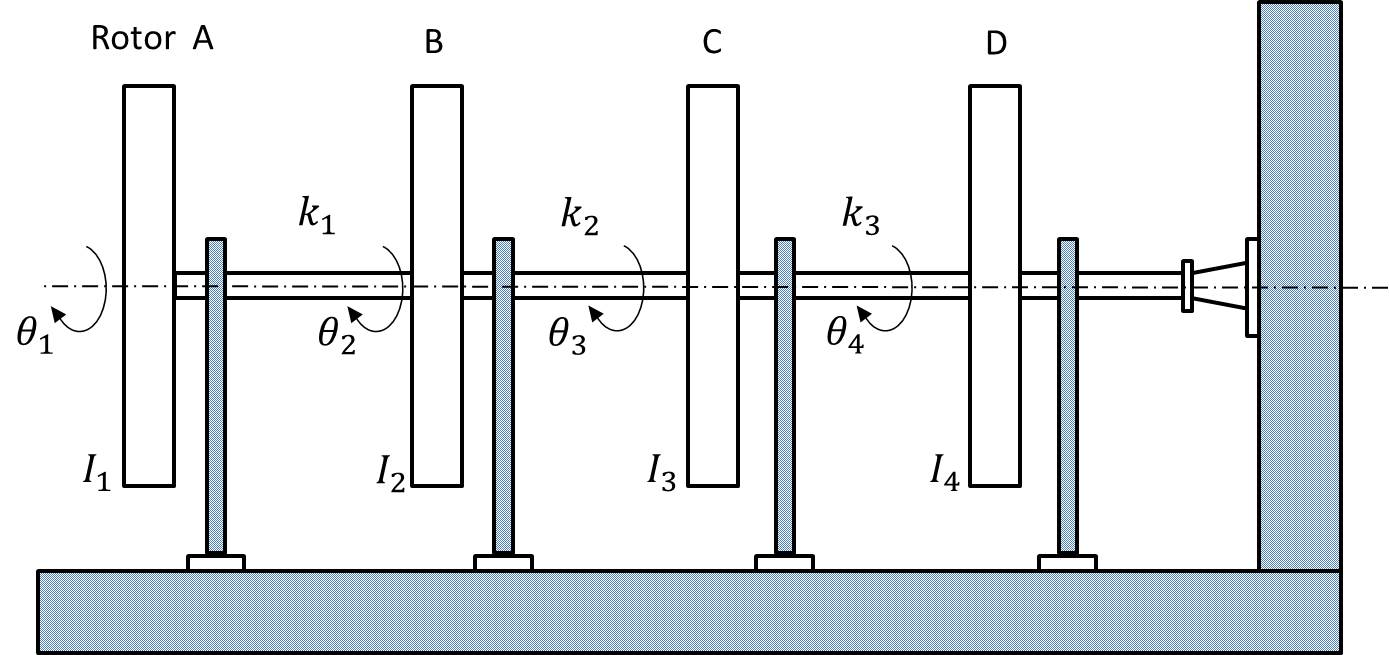

##Q#2.1

Assuming that the damping in the system is negligible, show that for small angular displacements the equations of motion of the system are given by
\begin{align}
I\ddot{\theta}+K\theta=T(t),
\end{align}
where
\begin{align}
\theta(t)=\left[\begin{array}{c}\theta_1(t)\\ \theta_2(t)\\ \theta_3(t) \\ \theta_4(t)\\\end{array}\right],\:\:\:\:
T(t)=\left[\begin{array}{c}\tau(t)\\ 0\\ 0 \\ 0 \end{array}\right],\:\:\:\:
\end{align}
\begin{align}
I=\begin{bmatrix} I_1 & 0 & 0& 0\\0 & I_2 & 0& 0 \\0 & 0 & I_3 & 0 \\0 & 0 & 0& I_4\end{bmatrix}
\end{align}
\begin{align}
K=\begin{bmatrix} k_1 & -k_1 & 0 & 0\\ -k_1 & (k_1+k_2) & -k_2 & 0 \\ 0 & -k_2 & (k_2+k_3) & -k_3 \\0 & 0 & -k_3 & (k_3+k_4)\end{bmatrix}
\end{align}



##Q#2.2

Writing down these equations in the form
\begin{align}
\ddot{\theta}+\Omega \theta=M^{-1}F(t),
\end{align}
where
\begin{align}
\Omega=
\begin{bmatrix}\omega_{n1}^2& -\omega_{n1}^2 & 0 & 0\\ -\mu_1\omega_{n1}^2& (\mu_1\omega_{n1}^2 +\omega_{n2}^2 )& -\omega_{n2}^2  & 0\\
0 &-\mu_2\omega_{n2}^2& (\mu_2\omega_{n2}^2 +\omega_{n3}^2 )& -\omega_{n3}^2\\
0 & 0 &-\mu_3\omega_{n3}^2& (\mu_3\omega_{n3}^2 +\omega_{n4}^2 )\\
\end{bmatrix}.
\end{align}
with
\begin{align}
\omega_{n1}^2=\frac{k_1}{I_1},\:\:\:\omega_{n2}^2=\frac{k_2}{I_2},\:\:\:\omega_{n3}^2=\frac{k_3}{I_3},\:\:\:\omega_{n4}^2=\frac{k_4}{I_4},
\end{align}
\begin{align}
\mu_1=\frac{I_1}{I_2},\:\:\:\:\mu_2=\frac{I_2}{I_3},\:\:\:\:\mu_3=\frac{I_3}{I_4},
\end{align}
find the modes of vibration of the system. 

Also qualitatively describe the behavior of each of the modes of vibration.


#Q#3 Wilberforce Oscillator

Consider the Wilberforce oscillatory system in the applied mechanics lab.  A schematic of the setup is shown in the figure below.

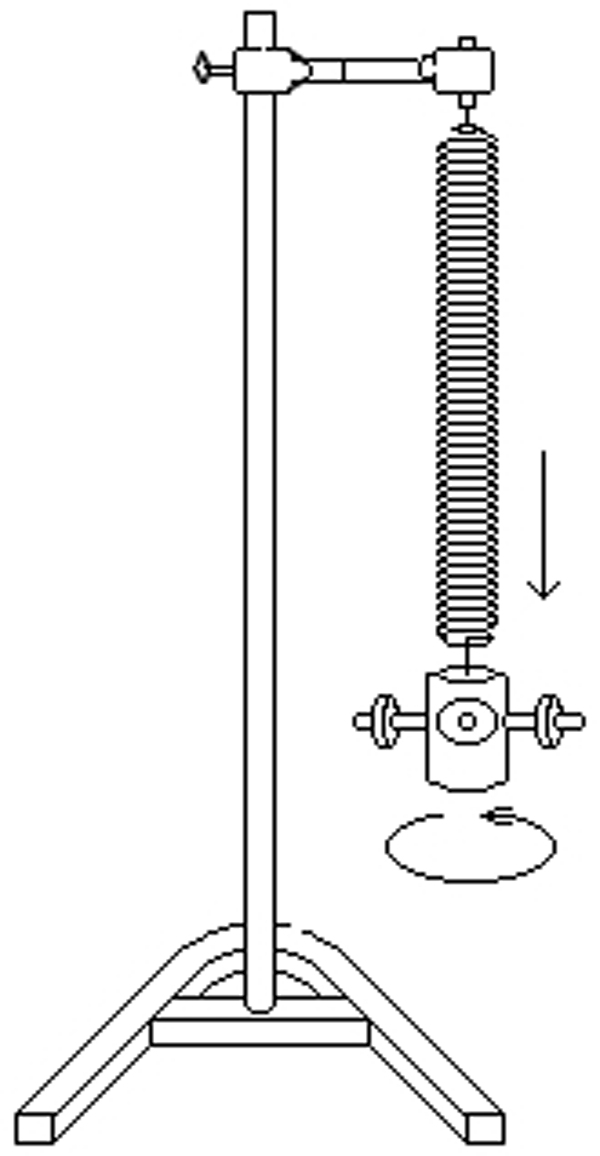


Assuming that the damping in the system is negligible, it can be shown that for small displacements the equations of motion of the system are given by
\begin{align}
M\ddot{x}+k_x x + \epsilon \theta&=& 0,\\
I\ddot{\theta}+k_\theta\theta + \epsilon x&=& 0,
\end{align}
where $\epsilon$ is the coupling parameter and is assumed to be very small (ie. $\epsilon <<1$). Answer the following with detailed justification:

## Q#3.1 Explain the source of the coupling.

##Q#3.2 Show that when $k_x/m\approx k_\theta/I$ the system exhibits a beating type of motion.

#Q#4 Modal Analysis - Finite Dimensional Systems

Let $\mathcal{X}$ be a $n$-dimensional vector space equipped with an inner product $\langle\langle \cdot,\cdot \rangle\rangle :\mathcal{X}\times \mathcal{X}\to \mathbb{R}$ (such a vector space is called a Hilbert space). Consider the mechanical system
\begin{align}
\ddot{x}+\Omega x=f(t),
\end{align}
where $x(t)\in \mathcal{X}$ and $\Omega :\mathcal{X}\to \mathcal{X}$ is a symmetric and positive definite linear operator with distinct eigenvalues (one can show that all its eigenvalues are positive). Denote by 
$\{\omega_1^1,\omega_2^2,\cdots,\omega_n^2\}$ the eigenvalues of $\Omega$ let $\{\bar{x}_1,\bar{x}_2,\cdots,\bar{x}_n\}$ be the corresponding normalized eigenvectors. Answer the following:



##Q#4.1 Explain why
\begin{align*}
\langle\langle \bar{x}_i,\bar{x}_j\rangle\rangle =\delta_{ij}.
\end{align*}


## Q4.2 Explain why any $x\in \mathcal{X}$ can be written down as
\begin{align*}
x=\sum_{i=1}^nz_i\,\bar{x}_i,
\end{align*}
where
\begin{align*}
z_i=\langle\langle \bar{x}_i,x\rangle\rangle.
\end{align*}


## Q4.3 Show that any solution of can be written down as
\begin{align*}
x(t)&=\sum_{i=1}^n z_i(t)\,\bar{x}_i
\end{align*}
where $z_i(t)$ satisfy
\begin{align*}
\ddot{z}_i+\omega_i^2z_i&= \langle\langle \bar{x}_i,f(t)\rangle\rangle\triangleq \gamma_i(t).
\end{align*}
